# Exploratory Data Analysis Project Review 2

In [42]:
# Loading the necessary header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2
from scipy.spatial import ConvexHull
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Loading the dataset
df = pd.read_csv('Global Health Statistics.csv')

## Identification of variables and data types

In [3]:
# Identifying the type of data
# We are classifing the columns here
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical Columns:")
for col in categorical_columns:
    print(col)
print()
print("\nNumerical Columns:")
for col in numerical_columns:
    print(col)

Categorical Columns:
Country
Disease Name
Disease Category
Age Group
Gender
Treatment Type
Availability of Vaccines/Treatment


Numerical Columns:
Year
Prevalence Rate (%)
Incidence Rate (%)
Mortality Rate (%)
Population Affected
Healthcare Access (%)
Doctors per 1000
Hospital Beds per 1000
Average Treatment Cost (USD)
Recovery Rate (%)
DALYs
Improvement in 5 Years (%)
Per Capita Income (USD)
Education Index
Urbanization Rate (%)


In [4]:
# Identifying the datatype
# Here we are defining the data type classification
nominal = ['Country', 'Disease Name', 'Disease Category', 'Gender', 'Treatment Type', 'Availability of Vaccines/Treatment']
ordinal = ['Age Group']
interval = ['Year']
ratio = [col for col in df.columns if col not in nominal + ordinal + interval]
# Printing Nominal Data
print("Nominal Data:")
for col in nominal:
    print(col)
print()
# Printing Ordinal Data
print("Ordinal Data:")
for col in nominal:
    print(col)
print()
# Printing Interval Data
print("Interval Data:")
for col in nominal:
    print(col)
print()
# Printing Ratio Data
print("Ratio Data:")
for col in nominal:
    print(col)
print()

Nominal Data:
Country
Disease Name
Disease Category
Gender
Treatment Type
Availability of Vaccines/Treatment

Ordinal Data:
Country
Disease Name
Disease Category
Gender
Treatment Type
Availability of Vaccines/Treatment

Interval Data:
Country
Disease Name
Disease Category
Gender
Treatment Type
Availability of Vaccines/Treatment

Ratio Data:
Country
Disease Name
Disease Category
Gender
Treatment Type
Availability of Vaccines/Treatment



## Analyzing the Basic Metrics

In [5]:
# Number of rows & columns
print(f"Dataset Shape: {df.shape}") 
# Summary Statistics (Numerical Data)
print("\nSummary Statistics:\n", df.describe())
# Head of the dataset
print("\nHead of Dataset:\n", df.head())
# Tail of the dataset
print("\nTail of Dataset:\n", df.tail())

Dataset Shape: (1000000, 22)

Summary Statistics:
                  Year  Prevalence Rate (%)  Incidence Rate (%)  \
count  1000000.000000       1000000.000000      1000000.000000   
mean      2011.996999            10.047992            7.555005   
std          7.217287             5.740189            4.298947   
min       2000.000000             0.100000            0.100000   
25%       2006.000000             5.090000            3.840000   
50%       2012.000000            10.040000            7.550000   
75%       2018.000000            15.010000           11.280000   
max       2024.000000            20.000000           15.000000   

       Mortality Rate (%)  Population Affected  Healthcare Access (%)  \
count      1000000.000000       1000000.000000         1000000.000000   
mean             5.049919        500735.427363              74.987835   
std              2.859427        288660.116648              14.436345   
min              0.100000          1000.000000              50

## Non-Graphical Univariate Analysis

### Categorical
#### Frequency Table

In [6]:
frequency_table = df['Gender'].value_counts()
print(frequency_table)

Gender
Male      333676
Female    333223
Other     333101
Name: count, dtype: int64


**Inference:**
The above frequency distribution table shows the distribution of the gender, that is how male, female and other gender are distrubed in the given dataset.

### Quantitative
### Measures of Central Tendency
#### 1. Mean

In [7]:
mean_doctors = df['Doctors per 1000'].mean()
print(mean_doctors)

2.747929220000001


**Inference:** The given code prints the average number of doctors per 1000.

#### 2. Median

In [8]:
median_urbanization = df['Urbanization Rate (%)'].median()
print(median_urbanization)

54.98


**Inference:** The middle value of urbanization is around 54.98 (in percentage)

#### 3. Mode

In [9]:
mode_percapitaincome = df['Per Capita Income (USD)'].mode()
print(mode_percapitaincome)

0    50248
1    71449
2    99172
Name: Per Capita Income (USD), dtype: int64


**Inference:** 99172 USD is the per capita income which is occuring more number of times.

### Measures of Dispersion
#### 1. Variance

In [10]:
variance = df['Population Affected'].var()
print(variance)

83324662943.1495


**Inference:** The above output shows the variance accounted by the population.

#### 2. Standard Deviation

In [11]:
std_dev = df['Population Affected'].std()
print(std_dev)

288660.1166478485


**Infernce:** The above output shows the standard deviation of the population affected and talks about its consistency. A high standard deviation implies it is deviated more from its mean value.

#### 3. Interquantile Range

In [12]:
iqr = df['Healthcare Access (%)'].quantile(0.75) - df['Healthcare Access (%)'].quantile(0.25)
# IQR = Q3-Q1
print(iqr)

25.019999999999996


**Inference:** Tells about Health access dispersion in percentage without being affected by the outliers.

#### 4. Range

In [13]:
data_range = df['Average Treatment Cost (USD)'].max() - df['Average Treatment Cost (USD)'].min()
print(data_range)

49900.0


**Inference:** Tells about the difference between Maximum Treatment Cost and the Minimum Treatment Cost in USD.

### Measures of Symmetry
#### 1. Skewness

In [14]:
skewness = skew(df['Recovery Rate (%)']) 
print(skewness)

0.0006390790643337454


**Inference:** skewness > 0, which implies data is positively skewed (right-skewed, longer tail on the right).

### Measures of Peakedness
#### 1. Kurtosis

In [15]:
kurt = kurtosis(df['Recovery Rate (%)'])
print(kurt)

-1.2020149845732908


**Inference:** If kurtosis < 0, implies data has lighter tails than a normal distribution (Platykurtic).



## Graphical Univariate Analysis

### Categorical
#### Pie Chart

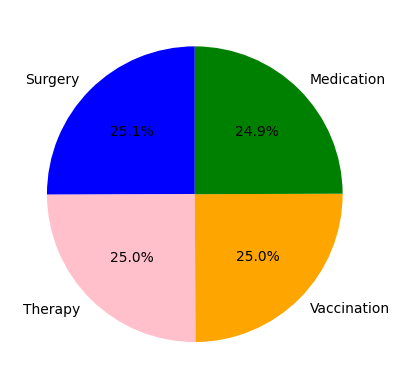

In [16]:
# Counting the occurrences of each gender
treatment_type_counts = df['Treatment Type'].value_counts()
# # Defining colors
colors = ['blue', 'pink', 'orange', 'green']  # Orange for Vaccination, Blue for Surgery, Pink for Therapy, Green for Medication
#Plotting the pie chart
plt.pie(treatment_type_counts, labels=treatment_type_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
# Displaying the chart
plt.show()

**Inference:** The above pie chart shows the distribution of treatment type across various countries over the years. Here all the treatment types have almost equal distribution.

### Quantitative
#### Histogram

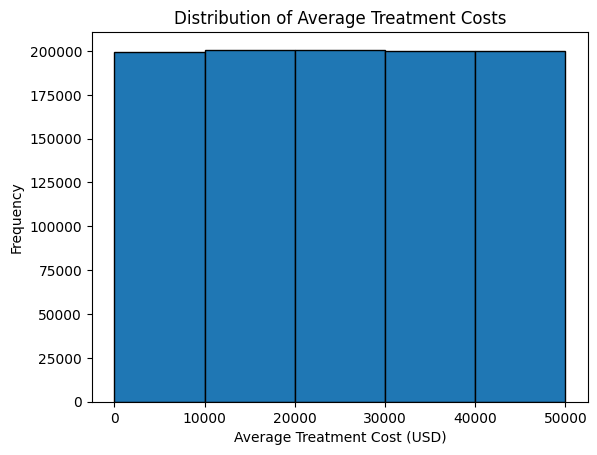

In [17]:
# Convert max value to an integer
max_cost = int(max(df['Average Treatment Cost (USD)']))
# Plotting the histogram with bins of 10,000
plt.hist(df['Average Treatment Cost (USD)'], bins=range(0, max_cost + 10000, 10000), edgecolor='black')
# Adding labels and title
plt.xlabel('Average Treatment Cost (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Treatment Costs')
# Displaying the histogram
plt.show()

**Inference:** The above histogram shows the distribution of the treatment costs. From the histogram we infer that the treatment cost is almost equally distributed in all price ranges.

## Bivariate Analysis
## Non-Graphical Analysis 
### Categorical
#### 1. Cross Tabulation


In [18]:
# Cross-tabulation between Gender and Disease Name
cross_table = pd.crosstab(df['Gender'], df['Disease Name'])
# Printing the table
print(cross_table)

Disease Name  Alzheimer's Disease  Asthma  COVID-19  Cancer  Cholera  Dengue  \
Gender                                                                         
Female                      16726   16775     16801   16624    16855   16522   
Male                        16606   16633     16772   16882    16867   17004   
Other                       16491   16714     16831   16779    16527   16763   

Disease Name  Diabetes  Ebola  HIV/AIDS  Hepatitis  Hypertension  Influenza  \
Gender                                                                        
Female           16523  16506     16842      16761         16538      16590   
Male             16783  16642     16445      16709         16502      16493   
Other            16714  16544     16987      16500         16351      16836   

Disease Name  Leprosy  Malaria  Measles  Parkinson's Disease  Polio  Rabies  \
Gender                                                                        
Female          16710    16634    16563      

**Inference:** The above table shows a cross tabulation between gender and the disease name. It shows the distribution of the gender with various diseases.

### Quantitative 
#### 1. Co-variance

In [19]:
covariance = df['Healthcare Access (%)'].cov(df['Doctors per 1000'])
print(covariance)

0.011564615205733588


**Inference:** The above co-variance value is close to 0, which implies there is no relationship between the healthcare access and the number of doctors per 1000 people.

#### 2. Correlation

In [20]:
correlation = df['Healthcare Access (%)'].corr(df['Doctors per 1000'])
print(correlation)

0.0006166553750159983


**Inference:** The above co-relation value is also close to 0, which implies there is no relationship between the healthcare access and the number of doctors per 1000 people.

## Graphical Analysis 

### Categorical
#### 1. Stacked Bar Plot

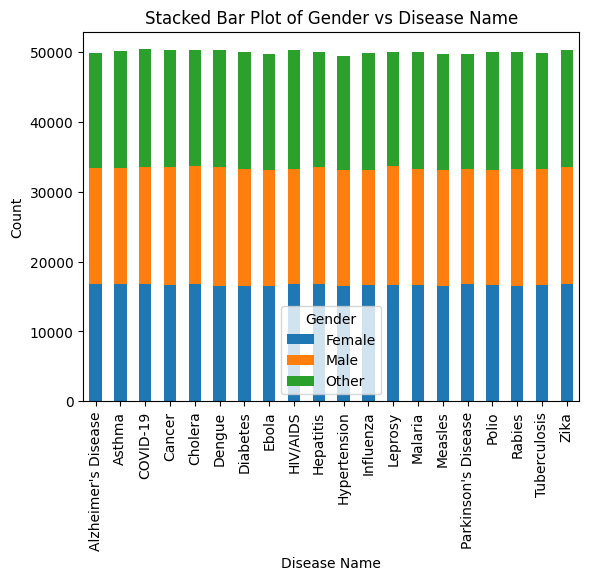

In [21]:
# Cross-tabulation of Gender vs Disease Name
cross_tab = pd.crosstab(df['Disease Name'], df['Gender'])
# Plotting a stacked bar chart
cross_tab.plot(kind='bar', stacked=True)
# Adding labels and title
plt.xlabel('Disease Name')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Gender vs Disease Name')
# Displaying the plot
plt.show()

**Inference:** The above stacked bar plot shows the distribution of gender and the disease name in a pictorial manner.

### Quantitative
#### 1. Line Chart

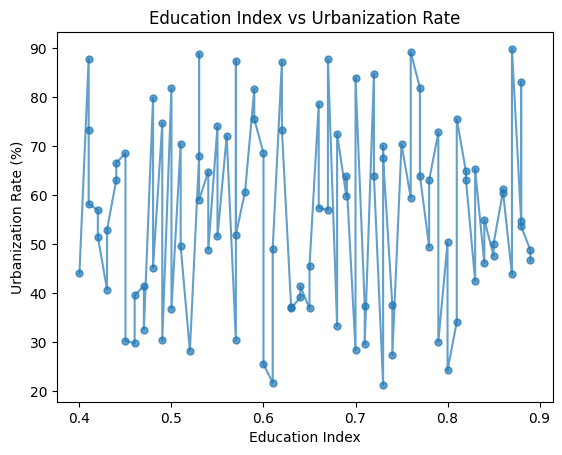

In [22]:
# Close any previous plots
plt.close('all')  
# Reduce the number of points plotted to avoid overplotting
df_sampled = df.sort_values(by='Education Index').iloc[::10000]  # Taking every 10000th point as we have many datapoints
# Plotting the line chart
plt.plot(df_sampled['Education Index'], df_sampled['Urbanization Rate (%)'], marker='o', linestyle='-', markersize=5, alpha=0.7)
# Adding labels and title
plt.xlabel('Education Index')
plt.ylabel('Urbanization Rate (%)')
plt.title('Education Index vs Urbanization Rate')
# Displaying the plot
plt.show()

**Inference:** The line chart shows a highly fluctuating relationship between the Education Index and the Urbanization Rate, with no clear upward or downward trend. The significant variability suggests that urbanization is influenced by multiple factors beyond just education levels. While localized patterns of increase and decrease are visible, the overall trend remains inconsistent, indicating a weak direct correlation. The presence of sharp spikes and sudden drops suggests external influences such as economic conditions, government policies, or migration trends impacting urbanization. This analysis implies that while education may play a role in urbanization, other factors need to be considered for a more comprehensive understanding of the relationship.

## Missing Value Treatment
## Linear Regression Imputation

In [23]:
# Shows missing values in each column
print(df.isnull().sum())

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                4
Treatment Type                        0
Average Treatment Cost (USD)          4
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


### Linear Regression Imputation for the column "Hospital Beds per 1000"

In [24]:
# Choosing the predictor columns
# In features column we have those columns that might help us to predict the missing values in missing column.
features = ["Prevalence Rate (%)", "Incidence Rate (%)", "Mortality Rate (%)", 
            "Healthcare Access (%)", "Doctors per 1000", "Per Capita Income (USD)"]  
target = "Hospital Beds per 1000"  
# Splitting data into known and missing values
df_train = df[df[target].notnull()]  # Rows where we have values
df_missing = df[df[target].isnull()]  # Rows where values are missing
# Traing a linear regresseion model
model = LinearRegression()  # Create a regression model  
model.fit(df_train[features], df_train[target])  # Train the model using known values 
# Predicting the missing values
df.loc[df[target].isnull(), target] = model.predict(df_missing[features])  

**Inference:** The code uses linear regression to predict missing values in the "Hospital Beds per 1000" column based on health-related factors such as prevalence rate, incidence rate, mortality rate, healthcare access, doctors per 1000, and per capita income. It first separates the dataset into two parts: one where the target variable is available (df_train) and another where it is missing (df_missing). A linear regression model is then trained using the known values and their corresponding feature data. Finally, the trained model predicts the missing values, which are then assigned back to the dataset. This approach assumes a linear relationship between the predictor variables and hospital bed availability, making it a useful but potentially limited method if the actual relationship is non-linear.

In [25]:
# Checking if there is any missing values in the imputed column
print(df.isnull().sum())

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          4
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


**Inference:** Now we don't have any missing value in the imputed column, which implies that all the missing values have been successfully imputed.
We still have to impute the values in the column "Average Treatment Cost (USD)".

### Linear Regression Imputation for the column "Average Treatment Cost (USD)"

In [26]:
# Choosing predictor columns 
features = ["Prevalence Rate (%)", "Incidence Rate (%)", "Mortality Rate (%)", 
            "Healthcare Access (%)", "Doctors per 1000", "Hospital Beds per 1000", 
            "Per Capita Income (USD)", "Education Index", "Urbanization Rate (%)"]  
target = "Average Treatment Cost (USD)"  # Column with missing values
# Splitting data into known and missing values
df_train = df[df[target].notnull()]  # Rows with known values
df_missing = df[df[target].isnull()]  # Rows where values are missing
# Training a linear regression model
model = LinearRegression()  # Create a regression model
model.fit(df_train[features], df_train[target])  # Train the model using known values
# Predicting missing values
df.loc[df[target].isnull(), target] = model.predict(df_missing[features]) 

**Inference:** The code uses linear regression to estimate missing values in the "Average Treatment Cost (USD)" column using health and economic factors such as prevalence rate, incidence rate, mortality rate, healthcare access, doctors per 1000, hospital beds per 1000, per capita income, education index, and urbanization rate. It first divides the dataset into two parts: one with known values (df_train) and one where the target variable is missing (df_missing). A linear regression model is then trained on the available data and used to predict the missing treatment costs. The predicted values are assigned back to the dataset, assuming a linear relationship between the predictor variables and treatment costs, which may not always capture complex dependencies.

In [27]:
# Checking if there is any missing values in the imputed column
print(df.isnull().sum())

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


**Inference:** Now we don't have any missing value in the imputed column, which implies that all the missing values have been successfully imputed.


## Outlier Analysis
### Statistical Method
#### Univariate Data - Grub's Test

In [28]:
# Select numerical column for univariate outlier detection
col = "Prevalence Rate (%)"
data = df[col].dropna()
# Grubbs' test formula
G = np.abs(data - np.mean(data)) / np.std(data)  # Test statistic
critical_value = stats.t.ppf(1 - 0.05 / (2 * len(data)), len(data) - 2)
outlier = data[np.argmax(G)] if max(G) > critical_value else None
print(f"Outlier in {col}: {outlier}")

Outlier in Prevalence Rate (%): None


**Inference:** No outlier's have been detected in the column "Prevalence Rate (%)".

#### Multivariate Data - Chi Square Test

In [29]:
# Selecting only numerical columns
cols = ["Prevalence Rate (%)", "Mortality Rate (%)", "Incidence Rate (%)"]  
X = df[cols].to_numpy()  # Convert DataFrame to NumPy array
# Compute mean and covariance matrix
mean = np.mean(X, axis=0)
cov_matrix = np.cov(X.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
# Compute Mahalanobis Distance Efficiently
diff = X - mean  # Shape (n_samples, n_features)
mahalanobis_sq = np.einsum('ij,ji->i', diff @ inv_cov_matrix, diff.T)  # Efficient computation
# Set threshold (95% confidence)
threshold = chi2.ppf(0.95, df=len(cols))
# Identify Outliers
outliers = mahalanobis_sq > threshold
df_outliers = df[outliers]
print(f"Number of outliers detected: {df_outliers.shape[0]}")

Number of outliers detected: 1512


**Inference:** The mulitvariate data selected has 1512 outliers.

### Graphical Method
#### Univariate Data - Box Plot

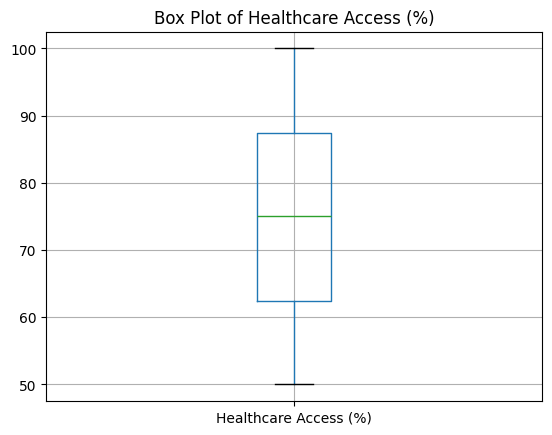

In [30]:
df.boxplot(column=["Healthcare Access (%)"])
plt.title("Box Plot of Healthcare Access (%)")
plt.show()

**Inference:** Since we don't have any dots outside the whiskers, we don't have any outliers in the column "Healthcare Access (%)"

#### Bivariate Data - Hexibin Plot

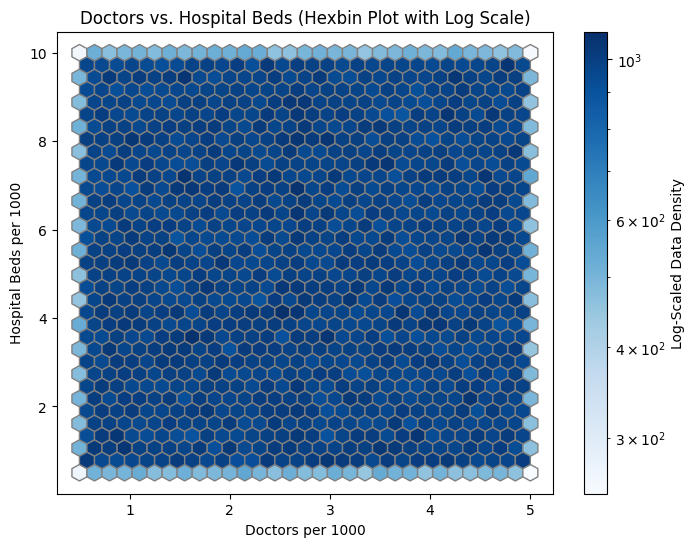

In [31]:
plt.figure(figsize=(8,6))
hb = plt.hexbin(df["Doctors per 1000"], df["Hospital Beds per 1000"], 
                gridsize=30, cmap='Blues', bins='log', mincnt=1, edgecolors='gray')
plt.colorbar(label="Log-Scaled Data Density")
plt.xlabel("Doctors per 1000")
plt.ylabel("Hospital Beds per 1000")
plt.title("Doctors vs. Hospital Beds (Hexbin Plot with Log Scale)")
plt.show()

**Inference:** The hexbin plot shows a uniform and dense distribution of data points across Doctors per 1000 and Hospital Beds per 1000, with no clear isolated regions, suggesting no significant outliers. The log-scaled density highlights variations, but the predominantly dark blue hexagons indicate consistent data spread. If outliers exist, they would appear as lighter-colored isolated hexagons, which are not prominent in this plot.

### Depth Based Method
#### Convex Hull Approach

In [32]:
# Select two numerical columns
X = df[["Population Affected", "Recovery Rate (%)"]].dropna().values
# Compute convex hull
hull = ConvexHull(X)
outliers = X[hull.vertices]
print(f"Number of outliers detected: {outliers.shape[0]}")

Number of outliers detected: 27


**Inference:** Using the convex hull algorithm, we are able to identify 27 outliers in the columns "Population Affected" and "Recovery Rate (%)", thereby flagging extreme recovery rates with abnormal affected population.

### Distance Based Method
#### Local Outlier Factor

In [33]:
# Select numeric column
X = df[["DALYs"]].dropna()
# Compute LOF
lof = LocalOutlierFactor(metric="manhattan")
outliers = X[lof.fit_predict(X) == -1]
print("LOF Outliers:\n", outliers)

LOF Outliers:
 Empty DataFrame
Columns: [DALYs]
Index: []


**Inference:** Empty Dataframe in LOF Outliers implies, there are no outliers in the column "DALYs".

### Density Based Method
#### Kernel Density Estimation

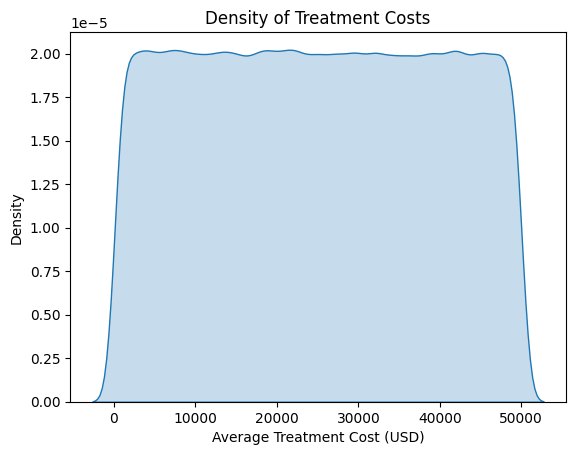

In [34]:
# KDE plot
sns.kdeplot(df["Average Treatment Cost (USD)"].dropna(), fill=True)
plt.title("Density of Treatment Costs")
plt.show()

**Inference:** The given plot have a very shorter tails implies there are no or very few outliers in the given column "Average Treatment Cost (USD)", that is the treatment cost is uniformly distributed with no extreme values.

### Clustering Based Method
#### K-Means Clustering

##### Step-1: Finding the optimal number of clusters using elbow method.

C:\Users\vidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\vidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

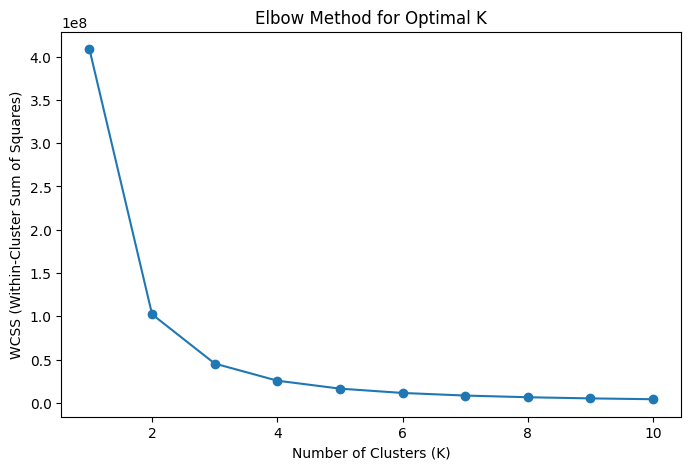

In [14]:
# Select numeric features
X = df[["Urbanization Rate (%)", "Education Index"]].dropna()
# Elbow Method to determine optimal number of clusters
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)  # Checking clusters from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Store WCSS for each cluster
# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

**Inference:** The Elbow Method graph helps determine the optimal number of clusters (K) for K-Means clustering by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. The sharp drop in WCSS from K=1 to K=3 indicates that adding more clusters significantly improves the model. However, after K=3, the reduction in WCSS becomes minimal, forming an "elbow" shape. This suggests that K=3 is the optimal number of clusters, as adding more clusters would not significantly improve clustering efficiency but would increase complexity. Hence, for effective clustering and outlier detection, three clusters should be used.

##### Step-2: Performing Hierarchical Clustering and Generating Dendrogram 

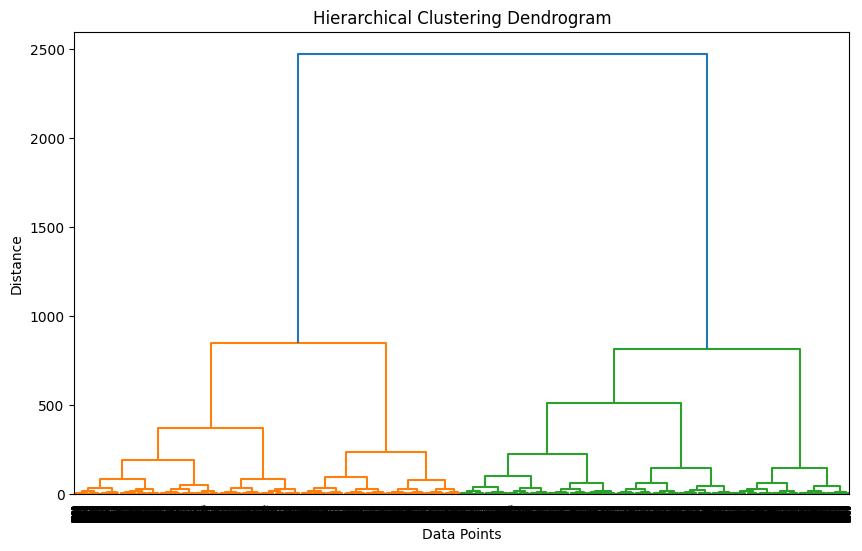

In [36]:
# Select a random sample of 10,000 data points (or fewer)
sampled_X = X.sample(n=10000, random_state=42)  
# Apply hierarchical clustering
linked = linkage(sampled_X, method='ward')
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

**Inference:** The hierarchical clustering dendrogram illustrates the progressive merging of data points into clusters. At lower levels, individual points or small groups combine, eventually forming two primary clusters (orange and green). The y-axis represents the distance (or dissimilarity) between clusters, with larger vertical merges indicating significant differences. The optimal number of clusters appears to be two, as cutting the dendrogram at a reasonable height (around 1500–2000) suggests this division. The final merge at approximately 2500 highlights the distinction between the two groups. No extreme outliers are evident, as all data points ultimately merge into these main clusters.

##### Optimal K Suggestion:
Given that both methods suggest a reasonable separation at K = 3, the optimal number of clusters for K-Means would be 3. This ensures meaningful groupings while avoiding excessive fragmentation.

##### Step-3: Applying K-Means Clustering Using the Optimal Number of Clusters

In [37]:
# Apply K-Means with the chosen number of clusters
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)
# Detect outliers (smallest cluster)
smallest_cluster = df["Cluster"].value_counts().idxmin()
outliers = df[df["Cluster"] == smallest_cluster]
print("Number of Outliers (Smallest Cluster Size):", outliers.shape[0])

Number of Outliers (Smallest Cluster Size): 330765


**Inference:** The K-Means clustering algorithm was applied with K = 3, the optimal number of clusters determined from the Elbow Method and the Dendrogram analysis. After fitting the model to the dataset, the smallest cluster, which contains the least number of data points, was identified as the outlier cluster. The number of points in this cluster is 330,765, indicating that these data points significantly differ from the other clusters. This suggests that a substantial portion of the dataset exhibits distinct characteristics compared to the other groups, potentially representing anomalies, rare occurrences, or a separate subgroup within the data.

**Inference:** Using the K-means clustering method, we are able to identify 329940 outliers from the columns "Urbanization Rate (%)" and "Education Index".

### Treating Categorical Data Outliers
#### FPOF - Frequent Pattern Outlier Factor

In [38]:
# Count frequencies
disease_counts = df["Disease Name"].value_counts(normalize=True)
# Mark rare diseases
rare_diseases = disease_counts[disease_counts < 0.01].index
df["Disease Name"] = df["Disease Name"].replace(rare_diseases, "Other")
print("Outliers: ", rare_diseases.shape[0])

Outliers:  0


**Inference:** The above code groups rare diseases (not frequently together), reducing unecessary categories and identifying outliers. The output shows that there is no occurence of any rare disease and hence we don't have any outliers in the given categorical data.

## Outlier Treatment
### Statistical Result

In [19]:
# Select only numerical columns
num_cols = df.select_dtypes(include='number').columns
# Loop through each numerical column
for col in num_cols:
    print(f"\n--- Outlier Treatment for Column: {col} ---")
    # Initial stats
    print("Before Treatment:")
    print(df[col].describe())
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # Cap outliers
    df[col] = df[col].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)
    # Updated stats
    print("After Treatment:")
    print(df[col].describe())


--- Outlier Treatment for Column: Year ---
Before Treatment:
count    1000000.000000
mean        2011.996999
std            7.217287
min         2000.000000
25%         2006.000000
50%         2012.000000
75%         2018.000000
max         2024.000000
Name: Year, dtype: float64
After Treatment:
count    1000000.000000
mean        2011.996999
std            7.217287
min         2000.000000
25%         2006.000000
50%         2012.000000
75%         2018.000000
max         2024.000000
Name: Year, dtype: float64

--- Outlier Treatment for Column: Prevalence Rate (%) ---
Before Treatment:
count    1000000.000000
mean          10.047992
std            5.740189
min            0.100000
25%            5.090000
50%           10.040000
75%           15.010000
max           20.000000
Name: Prevalence Rate (%), dtype: float64
After Treatment:
count    1000000.000000
mean          10.047992
std            5.740189
min            0.100000
25%            5.090000
50%           10.040000
75%        

### Graphical Result

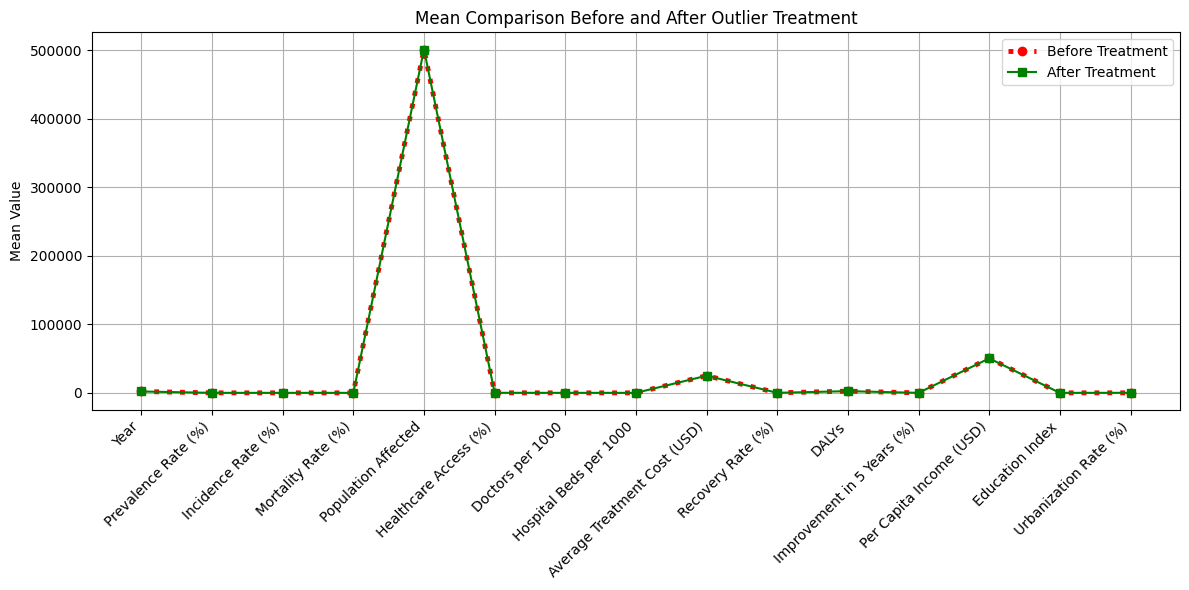

In [20]:
# Select numerical columns
num_cols = df.select_dtypes(include='number').columns
# Copy for before treatment
df_before = df.copy()
# Apply IQR-based outlier treatment
df_after = df.copy()
for col in num_cols:
    Q1 = df_after[col].quantile(0.25)
    Q3 = df_after[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_after[col] = df_after[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
# Compute mean values before and after treatment
mean_before = df_before[num_cols].mean()
mean_after = df_after[num_cols].mean()
# Plot mean values before vs after
plt.figure(figsize=(12, 6))
plt.plot(num_cols, mean_before, marker='o', linestyle='dotted', linewidth=3.5, color='red', label='Before Treatment')  # Thick & dotted
plt.plot(num_cols, mean_after, marker='s', linestyle='-', linewidth=1.5, color='green', label='After Treatment')  # Thin & continuous
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean Value")
plt.title("Mean Comparison Before and After Outlier Treatment")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation Analysis 
### Correlation Matrix

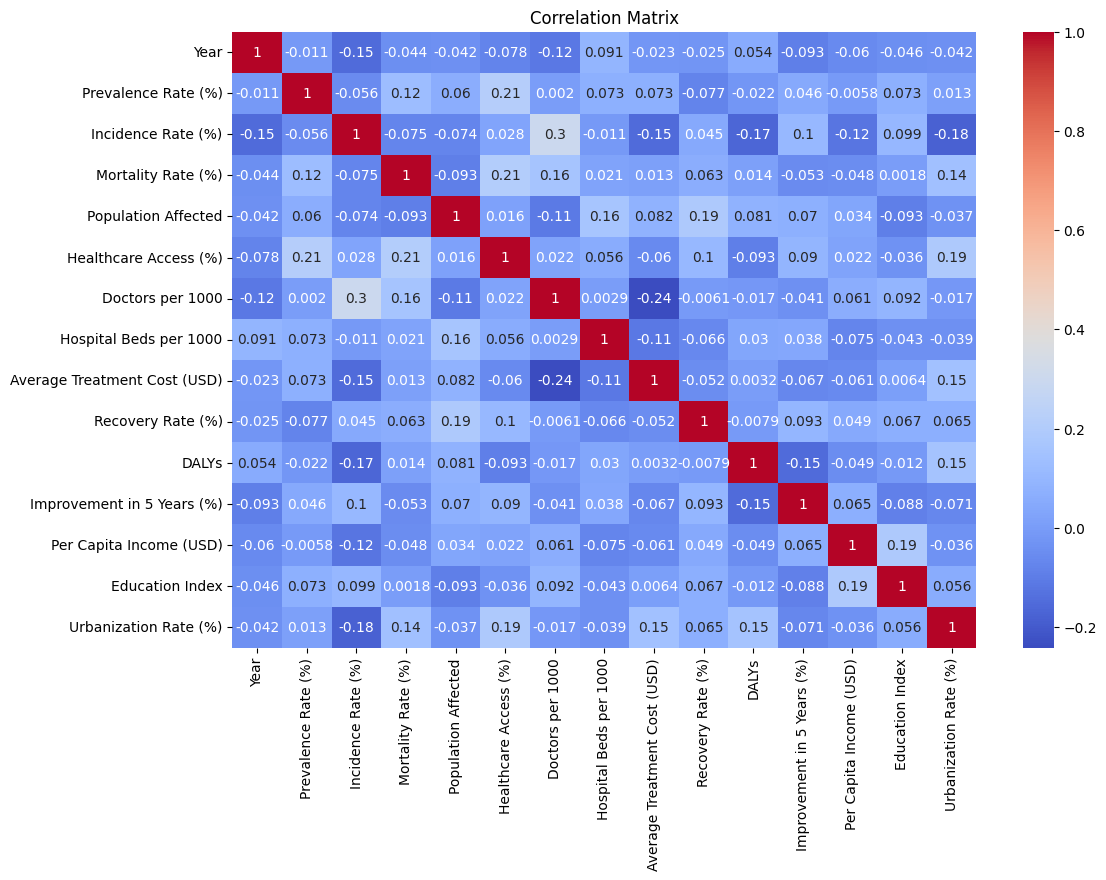

In [22]:
# Clean percentage columns
for col in df.columns:
    if df[col].dtype == 'object' and df[col].str.contains('%').any():
        df[col] = df[col].str.replace('%', '').astype(float)
# Correlation matrix to help pick features
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Inference:** The correlation matrix shows that there is no significant relationship between any of the variables are very close to 0. This means that changes in one variable (like prevalence rate, incidence rate, or urbanization rate) do not affect the others much. The diagonal values are 1.00, which is expected since each variable is perfectly correlated with itself. However, since real-world data usually has some degree of correlation, this result may suggest issues like incorrect data formatting, missing values, or improper scaling. 

## Dimensionality Reduction
### PCA - Principal Component Analysis

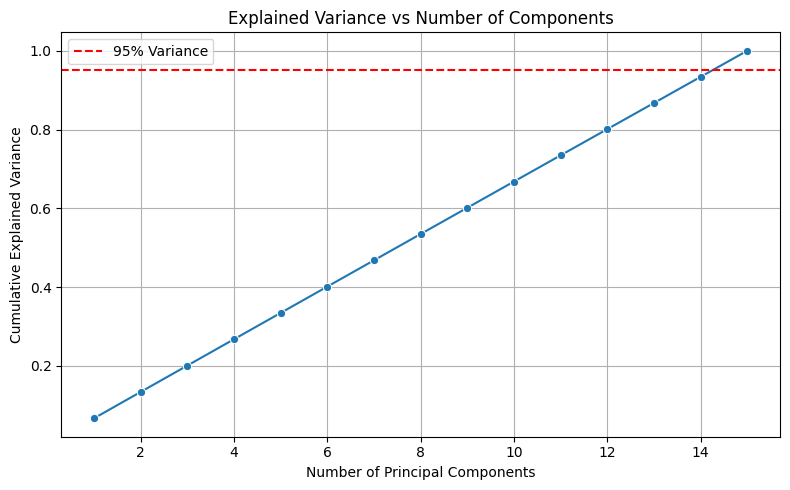

Optimal number of components: 15

Principal Component Loadings (Feature Contributions):
                                   PC1       PC2       PC3       PC4  \
Year                          0.085566 -0.087550 -0.307711 -0.245224   
Prevalence Rate (%)          -0.167858  0.193209  0.496502 -0.005327   
Incidence Rate (%)            0.192819  0.004360  0.481406 -0.201209   
Mortality Rate (%)           -0.245971  0.161876  0.110964  0.506332   
Population Affected           0.449046 -0.192722  0.313084 -0.242560   
Healthcare Access (%)         0.267732  0.105969  0.202113  0.385828   
Doctors per 1000             -0.083284 -0.317493  0.249523  0.107710   
Hospital Beds per 1000       -0.340951 -0.240885  0.169978  0.005091   
Average Treatment Cost (USD)  0.453731  0.114192 -0.185621 -0.176056   
Recovery Rate (%)             0.056715  0.533206 -0.002349 -0.036715   
DALYs                        -0.150330 -0.078817 -0.101510 -0.167684   
Improvement in 5 Years (%)   -0.206389  0.291437

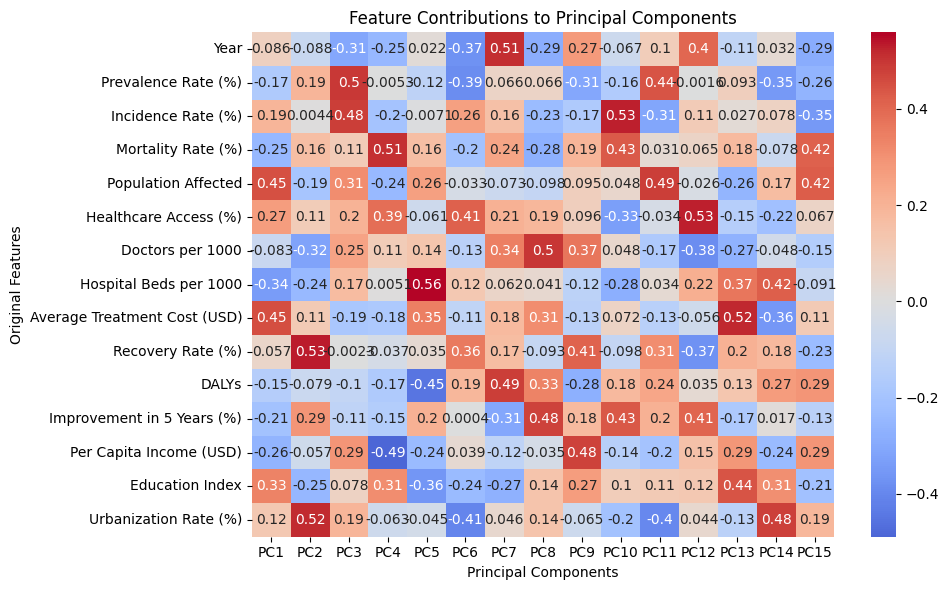

In [ ]:
# Select only numerical features for PCA
numerical_df = df.select_dtypes(include=['float64', 'int64'])
# Handle missing values (Imputation)
imputer = SimpleImputer(strategy="mean")  
imputed_data = imputer.fit_transform(numerical_df)
columns = numerical_df.columns  # Store column names for later use
# Standardize the features (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)
# Apply PCA and get principal components
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
# Create a DataFrame for PCA-transformed data
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
# Explained variance ratio (how much info each component holds)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# Visualize explained variance to select principal components
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, len(cumulative_variance) + 1), y=cumulative_variance, marker="o")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% Variance")  # Threshold guideline
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Choose optimal number of components (keeping 95% variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1  # Finds first component set above 95% variance
print(f"Optimal number of components: {optimal_components}")
# Apply PCA again with the optimal number of components
pca = PCA(n_components=optimal_components)
reduced_data = pca.fit_transform(scaled_data)
# Create a DataFrame with reduced dimensions
reduced_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(optimal_components)])
# Analyze Principal Component Loadings
loadings = pca.components_.T  # Transposed for easier readability
loading_df = pd.DataFrame(loadings, columns=[f"PC{i+1}" for i in range(optimal_components)], index=columns)
print("\nPrincipal Component Loadings (Feature Contributions):")
print(loading_df)
# Visualize Feature Contributions to Principal Components
plt.figure(figsize=(10, 6))
sns.heatmap(loading_df, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Contributions to Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.tight_layout()
plt.show()

**Inference:** 

The PCA analysis on the dataset successfully reduced its dimensionality while retaining critical information. Initially, the dataset contained numerous numerical features, making interpretation and analysis challenging. By applying PCA, I identified **15 principal components**, which together account for **95% of the variance** in the data. This reduction ensures that essential patterns and trends are preserved while eliminating redundancy.

Examining the principal component loadings, we can see which original features contribute most to each component. For instance, **Recovery Rate (%) significantly influences PC2**, whereas **Average Treatment Cost (USD) is a major contributor to PC1**. These findings suggest that different components represent distinct relationships—some capturing healthcare accessibility, others highlighting economic factors, and some reflecting disease impact. The variability across components confirms that individual features affect different aspects of healthcare and population health outcomes.

The plots provide valuable insights into the PCA results. The **cumulative variance graph** illustrates how variance increases as additional principal components are included, helping determine the optimal number of components. The **feature contribution heatmap** visualizes the influence of each variable on the principal components, showing which factors play a dominant role in shaping key trends. For example, **Education Index and Urbanization Rate (%) exhibit strong positive contributions in PC2**, emphasizing their importance in predicting healthcare access and demographic shifts.

Overall, the PCA transformation enabled me to extract the most significant features while simplifying the dataset for further analysis. By reducing the dataset to **15 key components**, we now have a structured and more interpretable representation that retains the most critical insights. This optimized dataset will enhance further modeling and visualization efforts, allowing me to focus on the most relevant factors influencing health and socioeconomic patterns. 

## Variable Transformation

In [44]:
print("Original Data Preview:")
print(df.head())  # View raw data before transformation
# Data Preparation & Transformation
print("\nRefining Data Quality for Analysis...")
# Log Transformation
print("\nApplying Log Transformation to Population Affected...")
df["Log_Population_Affected"] = np.log1p(df["Population Affected"])
# Standardization
print("\nStandardizing Numerical Columns...")
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=['float64', 'int64'])), 
                         columns=df.select_dtypes(include=['float64', 'int64']).columns)
# One-Hot Encoding for Categorical Variables
print("\nOne-Hot Encoding Categorical Columns...")
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  
encoded_columns = one_hot_encoder.fit_transform(df[["Disease Category", "Country"]])
df_encoded = pd.DataFrame(encoded_columns, 
                          columns=one_hot_encoder.get_feature_names_out(["Disease Category", "Country"]))
# Label Encoding for Age Group
print("\nLabel Encoding Age Group...")
label_encoder = LabelEncoder()
df["Label_Encoded_Age_Group"] = label_encoder.fit_transform(df["Age Group"])
# Feature Binning
print("\nCategorizing Urbanization Rate into Low, Medium, High...")
df["Urbanization_Level"] = pd.cut(df["Urbanization Rate (%)"], bins=[0, 30, 60, 100], labels=["Low", "Medium", "High"])
# Final Check: View Transformed Data
print("\nTransformed Data Preview:")
print(df.head())  # View transformed dataset

Original Data Preview:
     Country  Year         Disease Name Disease Category  Prevalence Rate (%)  \
0      Italy  2013              Malaria      Respiratory                 0.95   
1     France  2002                Ebola        Parasitic                12.46   
2     Turkey  2015             COVID-19          Genetic                 0.91   
3  Indonesia  2011  Parkinson's Disease       Autoimmune                 4.68   
4      Italy  2013         Tuberculosis          Genetic                 0.83   

   Incidence Rate (%)  Mortality Rate (%) Age Group Gender  \
0                1.55                8.42      0-18   Male   
1                8.63                8.75       61+   Male   
2                2.35                6.22     36-60   Male   
3                6.29                3.99      0-18  Other   
4               13.59                7.01       61+   Male   

   Population Affected  ...  Availability of Vaccines/Treatment  \
0               471007  ...                       

**Inference:** The provided code applies various data transformation techniques to prepare the dataset for analysis. It first displays the raw dataset before applying transformations to ensure clarity. The log transformation helps normalize the Population Affected column, making the data less skewed. Next, standardization adjusts numerical variables so they have a mean of zero and a consistent scale, which is useful for modeling. Categorical variables like Disease Category and Country are converted into numerical representations using One-Hot Encoding, creating separate binary columns for each unique category. The Age Group variable is encoded using Label Encoding to assign numerical values based on order. Additionally, Urbanization Rate (%) is grouped into Low, Medium, and High categories, making it easier to analyze trends across different levels of urbanization. After all transformations, the final dataset maintains important features while making numerical and categorical variables more structured and usable for further modeling. This ensures data is cleaned, standardized, and ready for deeper analysis or visualization.